Task1_0722. Adult Income 데이터셋을 이용한 전처리 및 분류 모델(소득이 50K 이상인지 예측)을 아래 설명을 참조하여 수행하세요.

[ 문제 설명 ]

- Adult Income 데이터셋을 로드합니다.
- 결측치를 처리합니다.
- 이상치를 제외합니다.
- 파생 변수를 작성합니다.
- 범주형 변수를 인코딩합니다.
- 변수 선택 및 독립변수 종속변수를 분리합니다.
- 데이터를 표준화합니다.
- 데이터셋을 학습용과 테스트용으로 나눕니다.
- Logistic Regression 모델 생성 및 학습합니다.
- 예측 및 평가합니다. - 정확도, 리포트

In [55]:
# 1. 데이터 로드
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)  #?는 널값으로 처리

In [56]:
df = data.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


소득에 연관된 항목 예상 (8개 항목)
나이, 직업군, 교육수준, 결혼, 직업, 인종, 성, 주당 근로시간, 순자본이득

  age   
   workclass       
  education      
  marital-status  
   occupation      
   race           
   sex             
  hours-per-week  
  capital-net     


In [57]:
# 결측치를 처리합니다.

df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


{'whiskers': [<matplotlib.lines.Line2D at 0x7a305d32f250>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305cdb3040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305d32d540>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305cdb0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305cdb37c0>],
 'means': []}

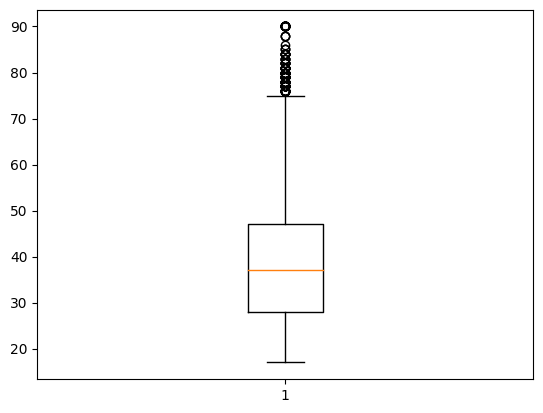

In [11]:
#이상치를 제외합니다.
import matplotlib.pyplot as plt

plt.boxplot(df['age'])

In [38]:
df['age'].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a305cda8a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305cda9e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305cdabb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305cdab130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305cdaad70>],
 'means': []}

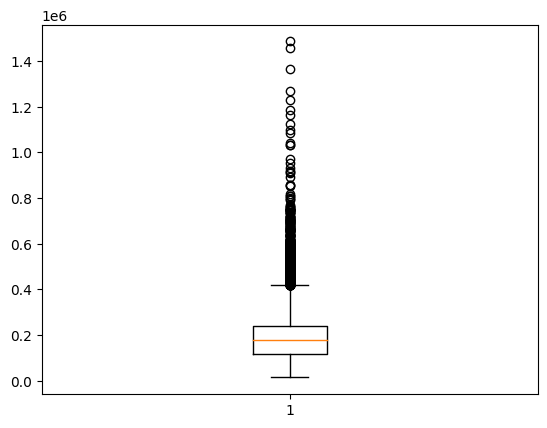

In [12]:
plt.boxplot(df['fnlwgt'])

In [30]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  84661, 257302, 201490])

In [31]:
df['fnlwgt'].value_counts()


fnlwgt
203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: count, Length: 20263, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a305d2294b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305d22bdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305d228130>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305d22b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305d228520>],
 'means': []}

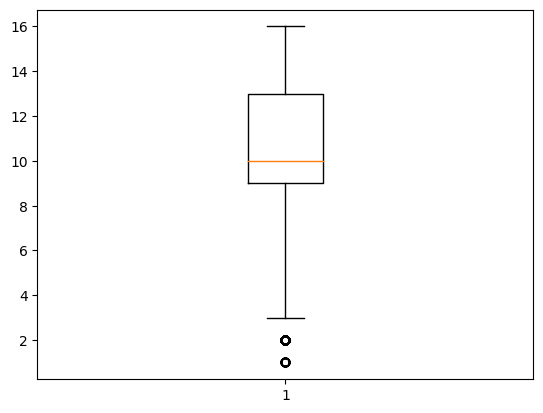

In [13]:
plt.boxplot(df['education-num'])

In [32]:
df['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 30162, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a305cf2ee00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305cf2dcf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305cf2d7e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305cf2c1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305cc541c0>],
 'means': []}

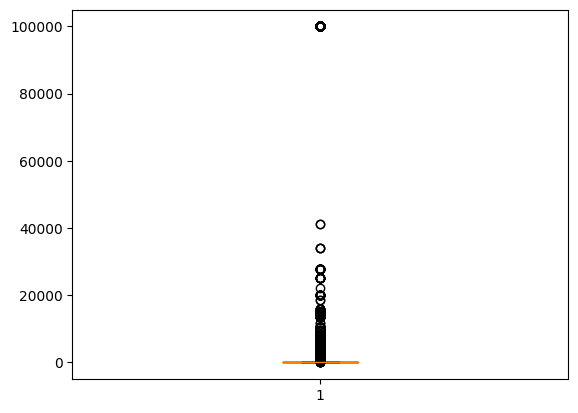

In [14]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a305cea3dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305cea3e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305cea32e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305cea2c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305cea2680>],
 'means': []}

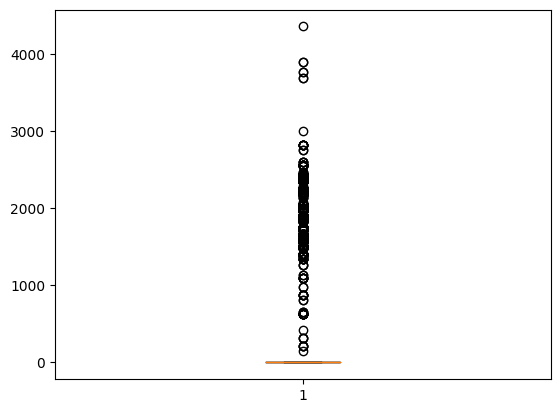

In [15]:
plt.boxplot(df['capital-loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a305cb73fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305cb90400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305cb73d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305cb90940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305cb90be0>],
 'means': []}

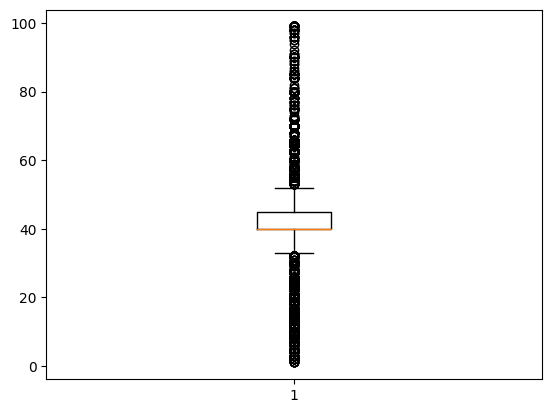

In [16]:
plt.boxplot(df['hours-per-week'])

In [ ]:
plt.boxplot(df['capital-loss'])

In [18]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [19]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 30162, dtype: object

In [20]:
df['education']

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 30162, dtype: object

In [22]:
#education 범주화 가능 , education-num 제외?

df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [23]:
#workclass 범주화 가능

df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [24]:
#marital-status 범주화 가능

df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [25]:
#occupation 범주화 가능

df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [26]:
#범주화 가능

df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [27]:
#race 범주화 가능

df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [28]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [59]:
#파생 변수를 작성합니다. 자본이익 - 자본 손실 = 순자본이득
df['capital-net'] = df['capital-gain'] - df['capital-loss']

In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'capital-net'],
      dtype='object')

In [45]:
#age, workclass, education, marital-status, occupation ,race, sex, hours-per-week, capital-net

In [ ]:
#범주형 변수를 인코딩합니다.
#workclass, education, marital-status, occupation ,race, sex


In [60]:
df = df[['age','workclass','education', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week', 'capital-net', 'income' ]]
df

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,capital-net,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,2174,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,0,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,0,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,0,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,0,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,0,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,0,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,0,<=50K


In [ ]:
#범주형 변수를 인코딩합니다.
#workclass	education	marital-status	occupation	race	sex


In [61]:
#workclass
#'State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay'

df['workclass'] = df['workclass'].map({'State-gov':0, 'Self-emp-not-inc':1, 'Private':2, 'Federal-gov':3, 'Local-gov':4, 'Self-emp-inc':5, 'Without-pay':6})

<ipython-input-61-9598af391df7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = df['workclass'].map({'State-gov':0, 'Self-emp-not-inc':1, 'Private':2, 'Federal-gov':3, 'Local-gov':4, 'Self-emp-inc':5, 'Without-pay':6})


In [62]:
#education
#'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school','5th-6th', '10th', 'Preschool', '12th', '1st-4th'
df['education'] = df['education'].map({'Bachelors':0, 'HS-grad':1, '11th':2, 'Masters':3, '9th':4, 'Some-college':5, 'Assoc-acdm':6, '7th-8th':7, 'Doctorate':8, 'Assoc-voc':9, 'Prof-school':10,'5th-6th':11, '10th':12, 'Preschool':13, '12th':14, '1st-4th':15})

<ipython-input-62-fcbdf5fce73a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].map({'Bachelors':0, 'HS-grad':1, '11th':2, 'Masters':3, '9th':4, 'Some-college':5, 'Assoc-acdm':6, '7th-8th':7, 'Doctorate':8, 'Assoc-voc':9, 'Prof-school':10,'5th-6th':11, '10th':12, 'Preschool':13, '12th':14, '1st-4th':15})


In [63]:
#marital-status
#'Never-married', 'Married-civ-spouse', 'Divorced','Married-spouse-absent', 'Separated', 'Married-AF-spouse','Widowed'
df['marital-status'] = df['marital-status'].map({'Never-married':0, 'Married-civ-spouse':1, 'Divorced':2,'Married-spouse-absent':3, 'Separated':4, 'Married-AF-spouse':5,'Widowed':6})

<ipython-input-63-2dfe55ad6ebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status'] = df['marital-status'].map({'Never-married':0, 'Married-civ-spouse':1, 'Divorced':2,'Married-spouse-absent':3, 'Separated':4, 'Married-AF-spouse':5,'Widowed':6})


In [64]:
#occupation
#'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners','Prof-specialty', 'Other-service', 'Sales', 'Transport-moving','Farming-fishing', 'Machine-op-inspct', 'Tech-support',  'Craft-repair', 'Protective-serv', 'Armed-Forces',  'Priv-house-serv'
df['occupation'] =  df['occupation'].map({'Adm-clerical':0, 'Exec-managerial':1, 'Handlers-cleaners':2,'Prof-specialty':3, 'Other-service':4, 'Sales':5, 'Transport-moving':6,'Farming-fishing':7, 'Machine-op-inspct':8, 'Tech-support':9,  'Craft-repair':10, 'Protective-serv':11, 'Armed-Forces':12,  'Priv-house-serv':13})

<ipython-input-64-80b4a2f658ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'] =  df['occupation'].map({'Adm-clerical':0, 'Exec-managerial':1, 'Handlers-cleaners':2,'Prof-specialty':3, 'Other-service':4, 'Sales':5, 'Transport-moving':6,'Farming-fishing':7, 'Machine-op-inspct':8, 'Tech-support':9,  'Craft-repair':10, 'Protective-serv':11, 'Armed-Forces':12,  'Priv-house-serv':13})


In [65]:
#race
#'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'
df['race'] = df['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3,'Other':4})

<ipython-input-65-eaa00f295eee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'] = df['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3,'Other':4})


In [66]:
#sex
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

<ipython-input-66-834f5d558ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})


In [67]:
df

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,capital-net,income
0,39,0,0,0,0,0,0,40,2174,<=50K
1,50,1,0,1,1,0,0,13,0,<=50K
2,38,2,1,2,2,0,0,40,0,<=50K
3,53,2,2,1,2,1,0,40,0,<=50K
4,28,2,0,1,3,1,1,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,2,6,1,9,0,1,38,0,<=50K
32557,40,2,1,1,8,0,0,40,0,>50K
32558,58,2,1,6,0,0,1,40,0,<=50K
32559,22,2,1,0,0,0,0,20,0,<=50K


In [68]:
#변수 선택 및 독립변수 종속변수를 분리합니다.
#독립변수
X = df.drop('income', axis=1)
#종속변수
y = df['income']

In [69]:
X

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,capital-net
0,39,0,0,0,0,0,0,40,2174
1,50,1,0,1,1,0,0,13,0
2,38,2,1,2,2,0,0,40,0
3,53,2,2,1,2,1,0,40,0
4,28,2,0,1,3,1,1,40,0
...,...,...,...,...,...,...,...,...,...
32556,27,2,6,1,9,0,1,38,0
32557,40,2,1,1,8,0,0,40,0
32558,58,2,1,6,0,0,1,40,0
32559,22,2,1,0,0,0,0,20,0


In [70]:
#데이터를 표준화합니다.
#capital-net 표준화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.04279571, -2.25653747, -0.98416176, ..., -0.69280616,
        -0.07773411,  0.1575135 ],
       [ 0.88028814, -1.18675527, -0.98416176, ..., -0.69280616,
        -2.3315307 , -0.13507425],
       [-0.03333996, -0.11697307, -0.6967823 , ..., -0.69280616,
        -0.07773411, -0.13507425],
       ...,
       [ 1.48937355, -0.11697307, -0.6967823 , ...,  1.44340518,
        -0.07773411, -0.13507425],
       [-1.25151078, -0.11697307, -0.6967823 , ..., -0.69280616,
        -1.74721307, -0.13507425],
       [ 1.0325595 ,  3.09237353, -0.6967823 , ...,  1.44340518,
        -0.07773411,  1.88693052]])

In [71]:
#데이터셋을 학습용과 테스트용으로 나눕니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [72]:
#Logistic Regression 모델 생성 및 학습합니다.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
#예측 및 평가합니다. - 정확도, 리포트
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy,4)}')
print('Confusion Matrix:')
print(conf_matrix,'\n')
print('Classification Report:')
print(class_report,'\n')

Accuracy: 0.7855
Confusion Matrix:
[[6436  331]
 [1610  672]] 

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6767
        >50K       0.67      0.29      0.41      2282

    accuracy                           0.79      9049
   macro avg       0.73      0.62      0.64      9049
weighted avg       0.77      0.79      0.75      9049
 

